# Project 4

In this project, you will summarize and present your analysis from Projects 1-3.

### Intro: Write a problem Statement/ Specific Aim for this project

Answer: Using the admissions dataset provided with context of GPA, GRE, and rating of undergraduate school's prestige analyze the relationship's of these features with regards to admittance. Using logistic regression predict using features made available to us(insert features) whether student will be admitted. 

### Dataset:  Write up a description of your data and any cleaning that was completed

Answer: There were 400 of observations in our dataset. 3 were missing data so we dropped the data. The final set was 397 admittance observations.

-dropped Null data since there were only 3 values and would not impact overall set. If there were more i'd consider a method of using other features such as gpa and gre to help fill in null.



In [61]:
#imports
from __future__ import division
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as pl
import numpy as np
%matplotlib inline

In [62]:
df_raw = pd.read_csv("../assets/admissions.csv")

In [63]:
print df_raw.info()   #identified data types 
print df_raw.isnull().sum() #identifed  2 nulls in gre and gpa and 1 in prestige
df = df_raw.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 12.6 KB
None
admit       0
gre         2
gpa         2
prestige    1
dtype: int64


<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 4 columns):
admit       397 non-null int64
gre         397 non-null float64
gpa         397 non-null float64
prestige    397 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.5 KB
[[<matplotlib.axes._subplots.AxesSubplot object at 0x11adbcdd0>


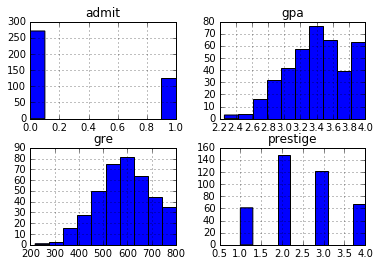

None


In [102]:
#data frame now all have values
df.info()
print df.hist()
print pl.show()

In [66]:
df.std()

admit         0.466044
gre         115.717787
gpa           0.380208
prestige      0.947083
dtype: float64

In [103]:
df.describe()

,admit,gre,gpa,prestige
count,397.000000,397.000000,397.000000,397.000000
mean,0.317380,587.858942,3.392242,2.488665
std,0.466044,115.717787,0.380208,0.947083
min,0.000000,220.000000,2.260000,1.000000
25%,0.000000,520.000000,3.130000,2.000000
50%,0.000000,580.000000,3.400000,2.000000
75%,1.000000,660.000000,3.670000,3.000000
max,1.000000,800.000000,4.000000,4.000000


### Demo: Provide a table that explains the data by admission status

In [104]:
dummy_ranks = pd.get_dummies(df['prestige'], prefix='prestige')

In [105]:
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2':])
data['intercept'] = 1.0

#creating dummies and joining it to new dataframe called data and adding a data intercept

In [106]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)
logit = sm.Logit(data['admit'], data[train_cols])
# fit the model
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [107]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Wed, 26 Oct 2016   Pseudo R-squ.:                 0.08166
Time:                        23:18:40   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa              0.7793      0.333      2.344      0.019         0.128     1.431
prestige_2.0    -0.6801      0.317     -2.14

In [108]:
print result.conf_int()

                     0         1
gre           0.000074  0.004362
gpa           0.127619  1.431056
prestige_2.0 -1.301337 -0.058936
prestige_3.0 -2.014579 -0.662776
prestige_4.0 -2.371624 -0.735197
intercept    -6.116077 -1.637631


In [109]:
# odds ratios only
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [110]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
print np.exp(conf)

                  2.5%     97.5%        OR
gre           1.000074  1.004372  1.002221
gpa           1.136120  4.183113  2.180027
prestige_2.0  0.272168  0.942767  0.506548
prestige_3.0  0.133377  0.515419  0.262192
prestige_4.0  0.093329  0.479411  0.211525
intercept     0.002207  0.194440  0.020716


Mean (STD) or counts by admission status for each variable 

| Not Admitted | Admitted
---| ---|---
GPA | mean(std)  | mean(std)
GRE |mean(std) | mean(std)
Prestige 1 | frequency (%) | frequency (%)
Prestige 2 | frequency (%) | frequency (%)
Prestige 3 |frequency (%) | frequency (%)
Prestige 4 |frequency (%) | frequency (%)

### Methods: Write up the methods used in your analysis

Answer: I created dummy variables for prestige so that i can turn a catagorical variable into a boolean values to understand the a linear relationship. I further explored the data via MLE method a simple linear regresion model.

### Results: Write up your results

Answer: The results of the model found that prestige 4 and 1 had a clear indication that they correlated with the admittance of graduate students. prestige 1 students had a higher likelihood of gaining admittance than students who went to a school with a prestige score of 4.a

In [113]:
def cartesian(arrays, out=None):

    arrays = [np.asarray(x) for x in arrays]

    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = n / arrays[0].size
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in xrange(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [115]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)

gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)

# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

/Users/linbrian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/linbrian/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:16: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [116]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
combos.head()

,gre,gpa,prestige,intercept
0,220.0,2.260000,1.0,1.0
1,220.0,2.260000,2.0,1.0
2,220.0,2.260000,3.0,1.0
3,220.0,2.260000,4.0,1.0
4,220.0,2.453333,1.0,1.0


In [120]:
# recreate the dummy variables
dummy_ranks = pd.get_dummies(combos['prestige'], prefix='prestige')
dummy_ranks.columns = ['prestige_1.0', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0']
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(dummy_ranks.ix[:, 'prestige_2.0':])


In [123]:
print len(combos)
# use the model you have already fitted to the real data to make predictions on this hypothetical data
combos['admit_pred'] = result.predict(combos[train_cols])



400


### Visuals: Provide a table or visualization of these results

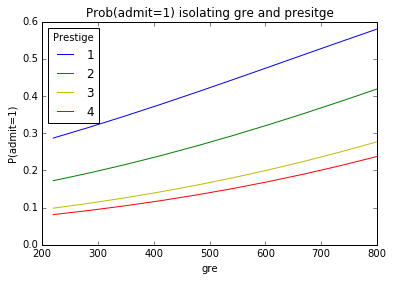

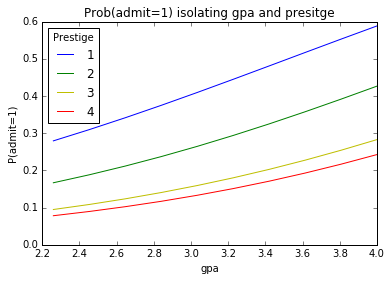

In [119]:
def isolate_and_plot(variable):
    grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                            aggfunc=np.mean)

    colors = 'rbgyrbgy'
    for col in combos.prestige.unique():
        plt_data = grouped.ix[grouped.index.get_level_values(1)==col]
        pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'],
                color=colors[int(col)])

    pl.xlabel(variable)
    pl.ylabel("P(admit=1)")
    pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
    pl.title("Prob(admit=1) isolating " + variable + " and presitge")
    pl.show()


isolate_and_plot('gre')
isolate_and_plot('gpa')

<img src='placeholder.png' height= 25% width= 25%>

<img src='placeholder.png' height= 25% width= 25%>

### Discussion: Write up your discussion and future steps

Answer: Using the logistic regression model we're able to see a clear relationship that as gre and gpa scores increase the prob. of admittance increases. Future steps would be to collect actual data in the upcoming years to validate our data model.

## Feedback

| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Outlined methods and models | | |X | |
| Articulation of "specific aim" and datasets | | |X | |
| Risks and assumptions | | |X | |
| Goals and criteria for success | | |X | |
| Exploratory data analysis overview with visualizations and statistical analysis | | |X | |
| Writeup with interpretation of findings, an executive summary, conclusions, and next steps | | |X | |